In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('kolesa/data.csv')
df = df.drop(columns='Car id')

/opt/conda/envs/jupyterhub/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,Car brand,Car name,Год,Цена,Город,Кузов,Двигатель,"Объем двигателя, л",Пробег,Коробка передач,Руль,Цвет,Привод,Растаможен в Казахстане,Аварийная/Не на ходу,На заказ,Описание
0,acura,Acura MDX,2007,7500000,Петропавловск,кроссовер,NaN,3.7 (газ-бензин),NaN,автомат,слева,серебристый металлик,полный привод,Да,NaN,NaN,"литые диски, тонировка, люк, кожа, ГУР, ABS, S..."
1,acura,Acura RDX,2007,5000000,Алматы,хэтчбек,NaN,2.3 (бензин),241 401 км,типтроник,слева,золотистый металлик,полный привод,Да,NaN,NaN,"литые диски, тонировка, люк, хрустальная оптик..."
2,acura,Acura RDX,2013,12800000,Алматы,кроссовер,NaN,3.5 (бензин),33 789 км,автомат,слева,вишня металлик,полный привод,Да,NaN,NaN,"литые диски, тонировка, люк, спойлер, рейлинги..."
3,acura,Acura MDX,2007,9000000,Нур-Султан (Астана),кроссовер,NaN,3.7 (бензин),105 000 км,автомат,слева,бирюзовый металлик,полный привод,Да,NaN,NaN,"литые диски, тонировка, люк, ветровики, ксенон..."
4,acura,Acura ZDX,2011,7900000,Нур-Султан (Астана),кроссовер,NaN,3.7 (бензин),215 606 км,автомат,слева,NaN,полный привод,Да,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94704,vaz,ВАЗ (Lada) 2190 (седан),2015,2000000,Алматы,седан,NaN,1.6 (бензин),NaN,механика,слева,серебристый металлик,передний привод,Да,NaN,NaN,\n ...
94705,vaz,ВАЗ (Lada) 2110 (седан),1999,839999,Уральск,седан,NaN,1.5 (бензин),NaN,механика,слева,бирюзовый,передний привод,Нет,NaN,NaN,"тонировка, ветровики, ксенон, хрустальная опти..."
94706,vaz,ВАЗ (Lada) 2114 (хэтчбек),2011,950000,Кызылорда,хэтчбек,NaN,1.6 (бензин),NaN,механика,слева,белый,передний привод,Нет,NaN,NaN,"техосмотр пройден, вложений не требует"
94707,vaz,ВАЗ (Lada) 2115 (седан),2007,980000,Атырау,седан,NaN,1.5 (бензин),247 000 км,механика,слева,голубой,передний привод,Да,NaN,NaN,"литые диски, тонировка, спойлер, алькантара, а..."


# Analysis of the data

In [4]:
df.columns

Index(['Car brand', 'Car name', 'Год', 'Цена', 'Город', 'Кузов', 'Двигатель',
       'Объем двигателя, л', 'Пробег', 'Коробка передач', 'Руль', 'Цвет',
       'Привод', 'Растаможен в Казахстане', 'Аварийная/Не на ходу', 'На заказ',
       'Описание'],
      dtype='object')

In [5]:
topCities = df['Город'].value_counts()[:20]
topEngines = df['Объем двигателя, л'].value_counts()[:20]
topCityIndices = df['Город'].apply(lambda y: y in topCities.index.to_list()) 
topEngineIndices = df['Объем двигателя, л'].apply(lambda y: y in topEngines.index.to_list()) 
topCarIndices = df['Car name'].value_counts()[:20].index

In [6]:
def toInt(year):
    newYear = ""
    for ch in year:
        if ch != ' ':
            newYear += ch
    return newYear

df['Пробег'] = df['Пробег'].dropna().apply(lambda x: toInt(x[:-3])).astype(int)

In [7]:
df['Car brand'].nunique(), df['Car name'].nunique(), set(df['Кузов']), set(df['Коробка передач'])

(94,
 1458,
 {'внедорожник',
  'кабриолет',
  'кроссовер',
  'купе',
  'лимузин',
  'лифтбек',
  'микроавтобус',
  'микровэн',
  'минивэн',
  'пикап',
  'родстер',
  'седан',
  'тарга',
  'универсал',
  'фастбек',
  'фургон',
  'хардтоп',
  'хэтчбек'},
 {'автомат', 'вариатор', 'механика', 'робот', 'типтроник'})

In [8]:
print("Median car release year {}, Median car mileage {} km, Median car price {} KZT".format(df['Год'].median(), df['Пробег'].median(), df['Цена'].median()))

Median car release year 2004.0, Median car mileage 150000.0 km, Median car price 2500000.0 KZT


<AxesSubplot:xlabel='Город'>

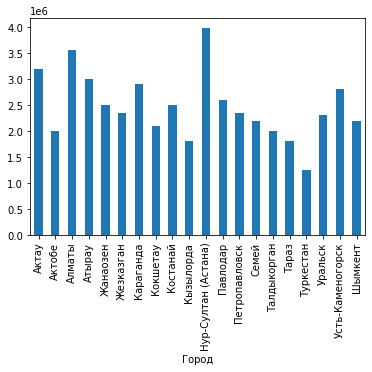

In [9]:
# Car numbers amoung regions
df[topCityIndices].groupby('Город').median()['Цена'].plot(kind='bar')

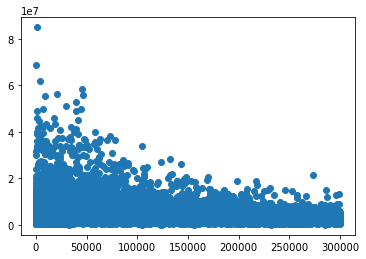

In [10]:
# Mileage to median car price scatter plot.
ser = df[df['Пробег'] < 300000].groupby('Пробег').median()['Цена']
plt.scatter(ser.index, ser)
plt.show()

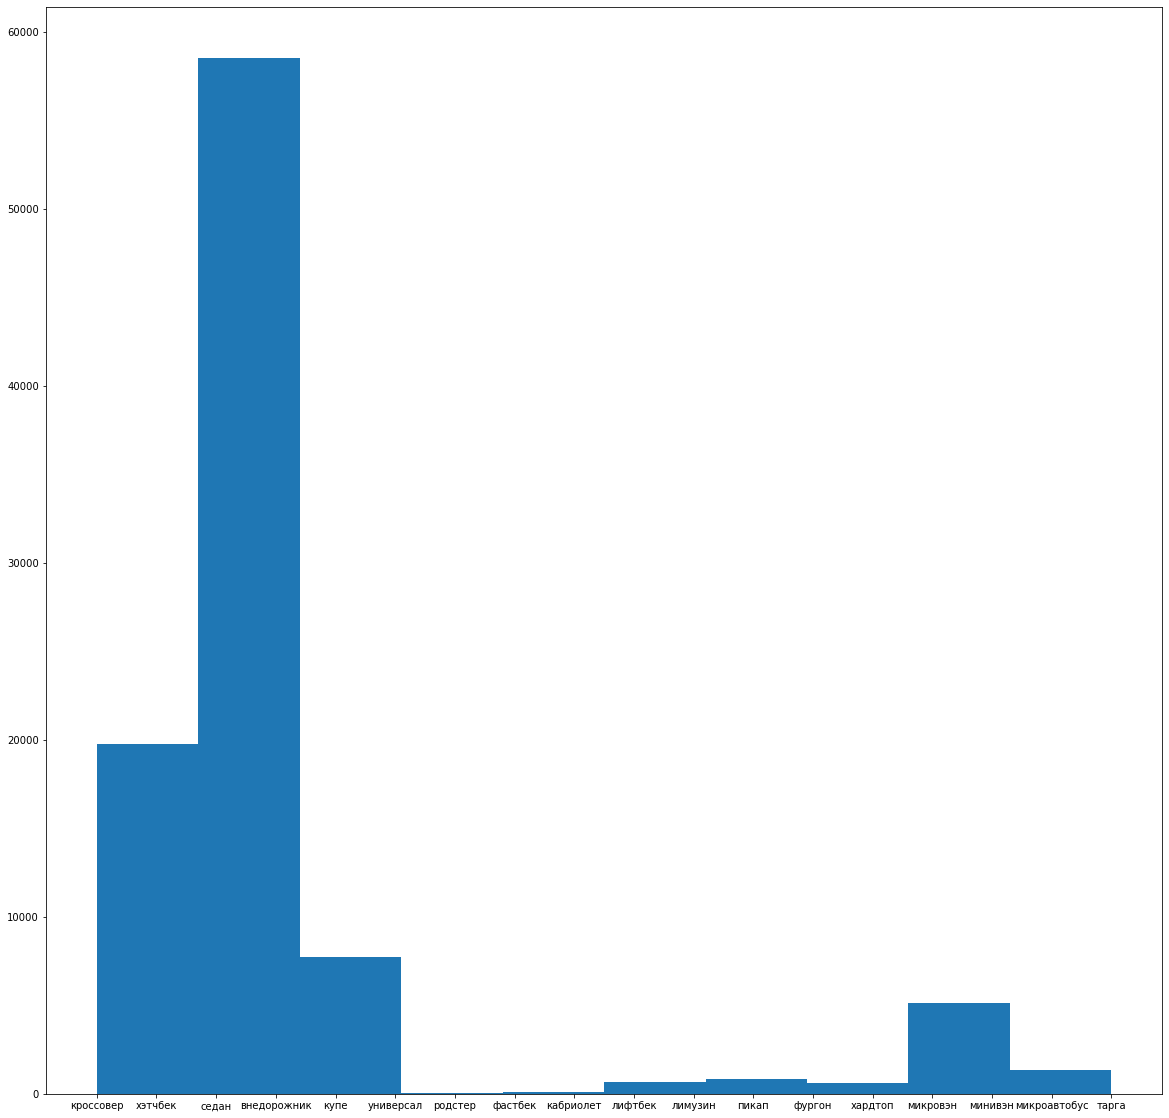

In [11]:
# Car body counts
plt.figure(figsize=(20,20))
plt.hist(df['Кузов'])
plt.show()

In [12]:
# The most expensive cars
df.groupby('Car name').mean().sort_values(by='Цена')[-30:]

,Год,Цена,Пробег
Car name,,,
Lexus LC,2017.000000,4.100000e+07,3000.000000
Porsche Cayenne Coupe,2020.000000,4.100000e+07,NaN
Mercedes-Benz GLE 450,2019.333333,4.197070e+07,9529.500000
Audi Q8,2019.625000,4.292296e+07,7907.428571
Maserati Levante,2017.000000,4.459500e+07,9060.000000
Tesla Model X,2017.777778,4.530000e+07,19276.888889
Mercedes-Benz EQC,2020.000000,4.607000e+07,4000.000000
BMW X7,2019.586207,4.615011e+07,9457.000000
Mercedes-Benz GLE Coupe 450 AMG,2019.000000,4.641800e+07,38442.500000


In [31]:
# The cheapest cars
df.groupby('Car name').mean().sort_values(by='Цена')[:30]

,Год,Цена,Пробег
Car name,,,
Mitsubishi,1995.000000,111000.000000,4.129987e+05
Opel Ascona,1987.000000,325000.000000,4.822689e+05
Daewoo Prince,1994.000000,350000.000000,3.064989e+05
Ford GT,1984.000000,350000.000000,4.804507e+05
Fiat UNO,1983.000000,350000.000000,1.234560e+05
Brilliance BS4,2008.000000,360000.000000,1.877506e+05
Nissan 100NX,1993.333333,400000.000000,4.283121e+05
Opel Rekord,1988.500000,425000.000000,1.273340e+06
Opel Kadett,1989.000000,430183.636364,5.339130e+05


<AxesSubplot:xlabel='Привод'>

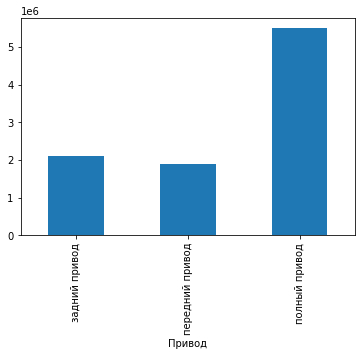

In [13]:
# Car Transmission count
df.groupby('Привод').median()['Цена'].plot(kind='bar')

<AxesSubplot:xlabel='Объем двигателя, л'>

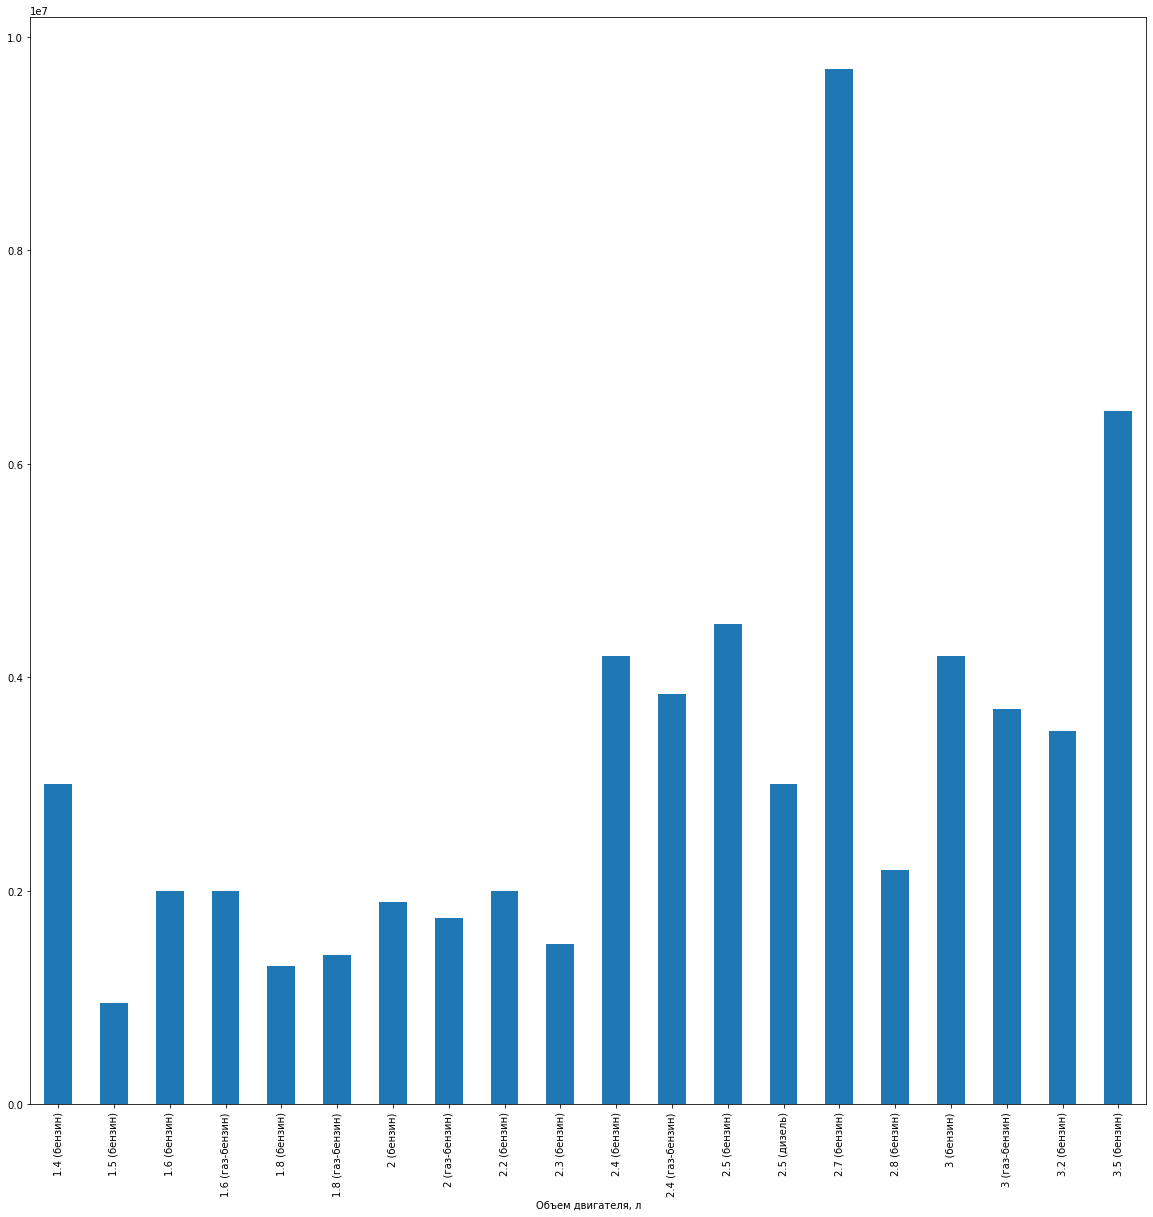

In [14]:
# Car engine counts
df[topEngineIndices].groupby('Объем двигателя, л').median()['Цена'].plot(kind='bar',figsize=(20,20))

<AxesSubplot:xlabel='Цвет'>

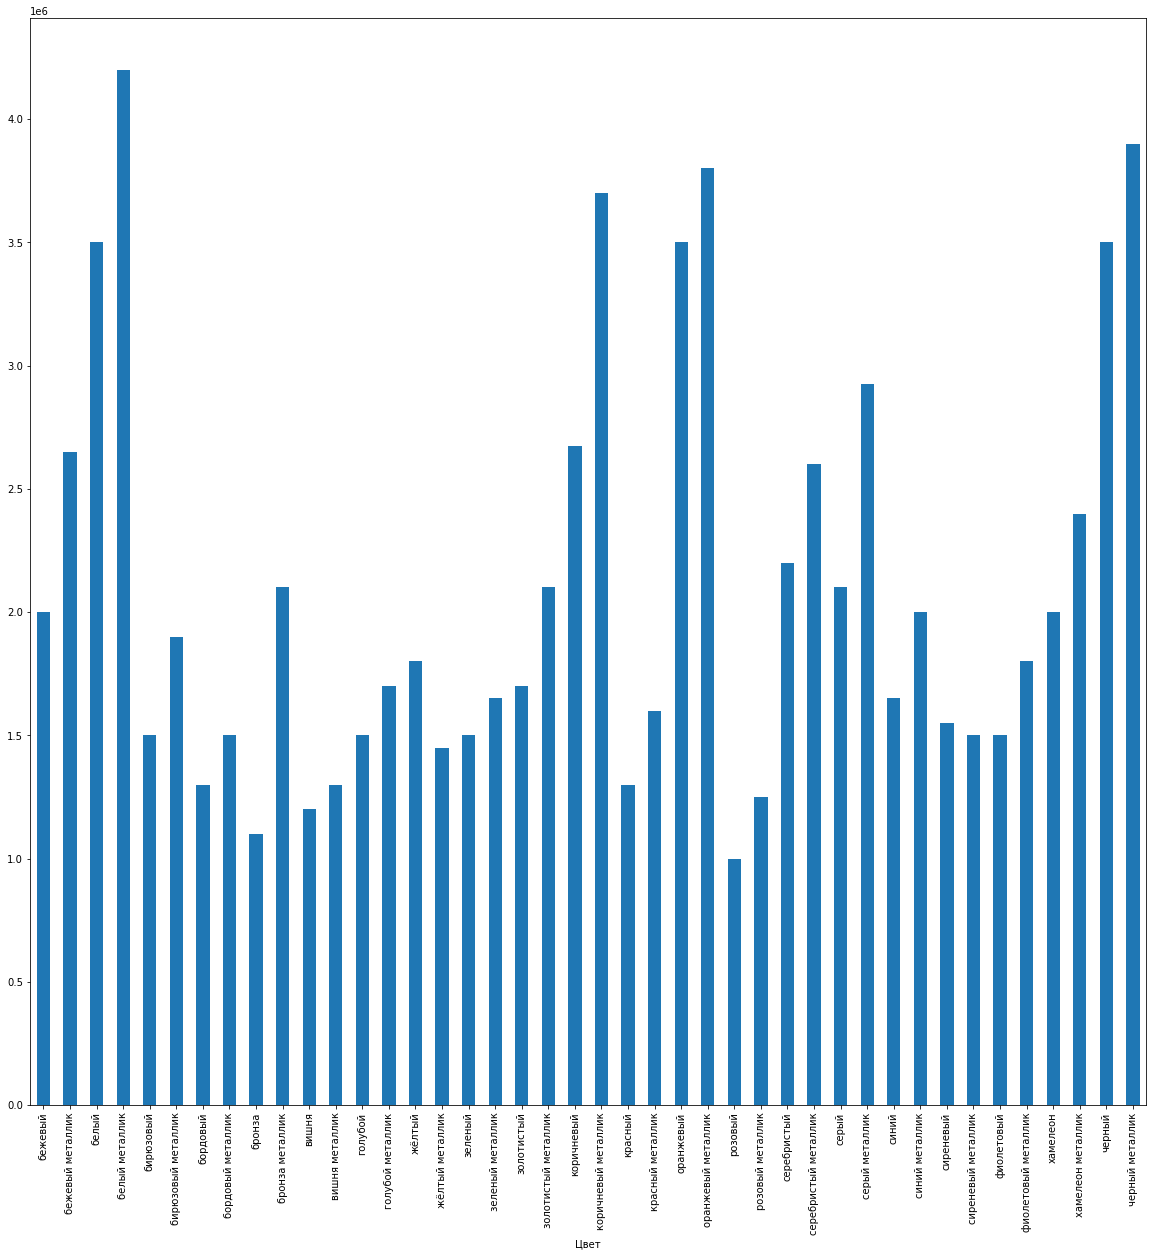

In [15]:
# Car color counts
df.groupby('Цвет').median()['Цена'].plot(kind='bar',figsize=(20,20))

In [16]:
df.corr()

,Год,Цена,Пробег
Год,1.000000,0.474492,-0.243613
Цена,0.474492,1.000000,-0.132173
Пробег,-0.243613,-0.132173,1.000000


<AxesSubplot:xlabel='Город'>

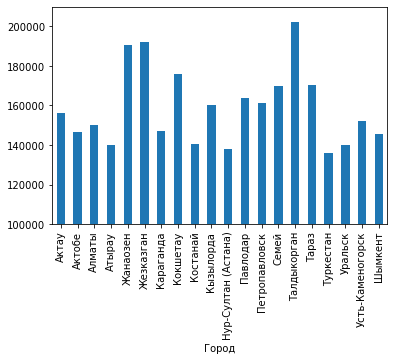

In [18]:
# Median car mileage among top regions by car numbers.
df[topCityIndices].groupby('Город').median()['Пробег'].plot(kind='bar', ylim=(100000, 210000))

<AxesSubplot:xlabel='Город'>

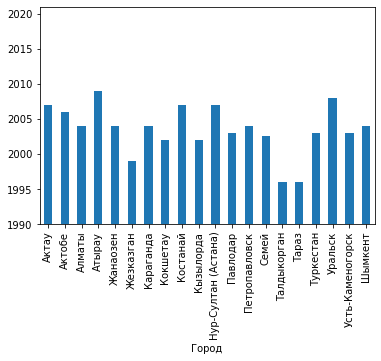

In [19]:
# Median release year among top regions by car numbers.
df[topCityIndices].groupby('Город').median()['Год'].plot(kind='bar', ylim=(1990, 2021))

<AxesSubplot:xlabel='Город'>

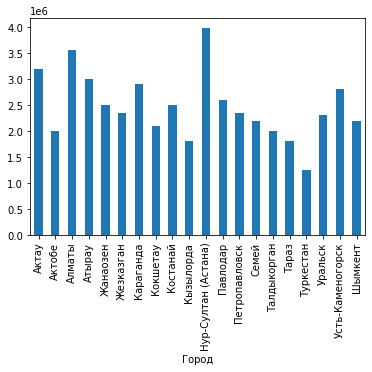

In [20]:
# Median car prices among top regions by car numbers.
df[topCityIndices].groupby('Город').median()['Цена'].plot(kind='bar')

In [17]:
# The most popular cars in Kazakhstan
df['Car name'].value_counts()[:20]

Toyota Camry                 4773
Daewoo Nexia                 3056
Volkswagen Passat            2533
Audi 100                     2198
ВАЗ (Lada) 2114 (хэтчбек)    1771
Volkswagen Golf              1675
Opel Vectra                  1606
Audi 80                      1500
Toyota Land Cruiser Prado    1281
Hyundai Accent               1124
Mercedes-Benz E 230          1112
Toyota Land Cruiser          1090
Toyota Corolla               1068
Audi A6                      1011
Mazda 626                     933
Toyota RAV 4                  885
ВАЗ (Lada) 2107               883
ВАЗ (Lada) 2115 (седан)       858
Mercedes-Benz E 200           854
Mitsubishi Galant             833
Name: Car name, dtype: int64

In [21]:
# The popular cars' median values 
df.groupby('Car name').median().loc[topCarIndices]

,Год,Цена,Пробег
Toyota Camry,2007.0,5200000.0,154000.0
Daewoo Nexia,2009.0,1100000.0,151000.0
Volkswagen Passat,1992.0,1300000.0,272066.5
Audi 100,1991.0,1500000.0,292828.0
ВАЗ (Lada) 2114 (хэтчбек),2008.0,900000.0,154000.0
Volkswagen Golf,1993.0,1200000.0,200000.0
Opel Vectra,1993.0,900000.0,252325.5
Audi 80,1991.0,955000.0,289447.0
Toyota Land Cruiser Prado,2008.0,10500000.0,146080.0
Hyundai Accent,2014.0,4350000.0,103313.0


In [22]:
tmp = df.set_index(df['Город'])
for city in topCities.index.to_list():
    carsNumber = tmp.loc[city].groupby('Car name').count()['Car brand']
    print("The most popular car in {} is {}".format(city, carsNumber.index[carsNumber.argmax()]))

The most popular car in Алматы is Toyota Camry
The most popular car in Нур-Султан (Астана) is Toyota Camry
The most popular car in Шымкент is Daewoo Nexia
The most popular car in Актобе is ВАЗ (Lada) 2114 (хэтчбек)
The most popular car in Караганда is Volkswagen Passat
The most popular car in Тараз is Volkswagen Passat
The most popular car in Уральск is Toyota Camry
The most popular car in Атырау is Toyota Camry
The most popular car in Актау is Toyota Camry
The most popular car in Костанай is ВАЗ (Lada) 2114 (хэтчбек)
The most popular car in Кызылорда is Daewoo Nexia
The most popular car in Усть-Каменогорск is Toyota Camry
The most popular car in Павлодар is Toyota Camry
The most popular car in Талдыкорган is Toyota Camry
The most popular car in Кокшетау is Volkswagen Passat
The most popular car in Туркестан is Daewoo Nexia
The most popular car in Семей is Toyota Camry
The most popular car in Петропавловск is Volkswagen Passat
The most popular car in Жезказган is Toyota Estima
The most

# Car shares through Kazakhstan regions

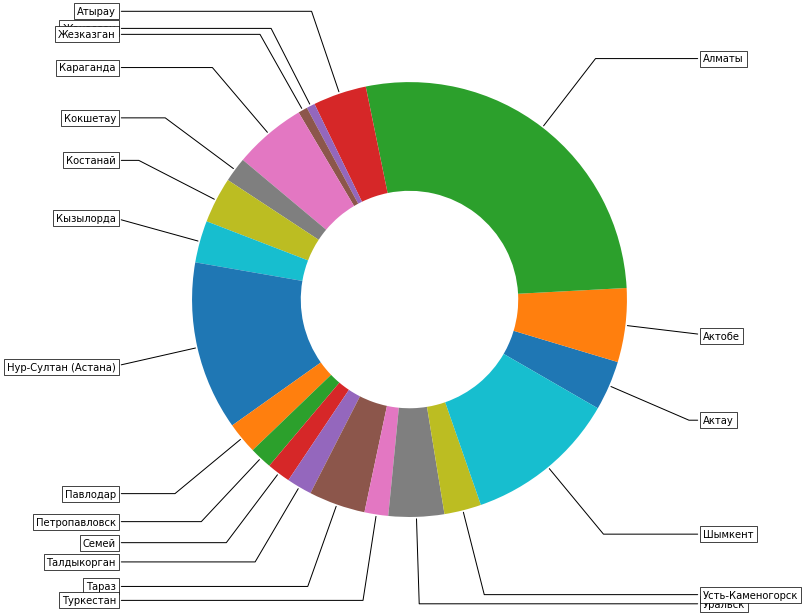

In [23]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

cities = df[topCityIndices].groupby('Город').count()['Car brand'].index
wedges, texts = ax.pie(df[topCityIndices].groupby('Город').count()['Car brand'], wedgeprops=dict(width=0.5), startangle=330)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(cities[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

# Dataset Cleaning

In [24]:
df.isna().sum()

Car brand                      0
Car name                       0
Год                            0
Цена                           0
Город                         10
Кузов                          0
Двигатель                  94660
Объем двигателя, л            63
Пробег                     36966
Коробка передач                0
Руль                           0
Цвет                        9490
Привод                     10060
Растаможен в Казахстане        0
Аварийная/Не на ходу       92308
На заказ                   90744
Описание                   11083
dtype: int64

In [25]:
df = df.drop(columns=['Двигатель', 'Аварийная/Не на ходу', 'На заказ'])
df = df[df['Город'].notna()]
df = df[df['Объем двигателя, л'].notna()]

In [26]:
car_year = df.groupby('Год').mean()

In [27]:
car_year

,Цена,Пробег
Год,,
1950,1.200000e+07,2.000000e+04
1960,1.250000e+06,NaN
1965,1.500000e+05,3.000000e+05
1966,6.600000e+06,1.815000e+05
1970,2.530000e+07,NaN
1973,6.000000e+05,5.900000e+04
1974,1.250000e+06,5.547700e+04
1975,4.470000e+06,3.533150e+05
1976,5.237143e+06,8.960000e+04


In [28]:
import math
from tqdm import tqdm
for idx, mileage in tqdm(enumerate(df['Пробег'])):
    if math.isnan(mileage):
        df.iloc[idx, df.columns.get_loc('Пробег')] = car_year.loc[df.iloc[idx]['Год']]['Пробег']
df = df[df['Пробег'].notna()]
df = df[df['Описание'].notna()]

94636it [00:26, 3549.16it/s]


In [29]:
# Мы узнали что белый металлик и полный привод является самым популярным 
df['Цвет'] = df['Цвет'].fillna('белый металлик')
df['Привод'] = df['Привод'].fillna('полный привод')

In [30]:
df.isna().sum()

Car brand                  0
Car name                   0
Год                        0
Цена                       0
Город                      0
Кузов                      0
Объем двигателя, л         0
Пробег                     0
Коробка передач            0
Руль                       0
Цвет                       0
Привод                     0
Растаможен в Казахстане    0
Описание                   0
dtype: int64